In [17]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline 

In [18]:
# import all pyphysio classes and methods
import pyphysio as ph

In [19]:
# import data and creating a signal
df_BVP = pd.read_csv('BVP_pp57.csv', header=None)


In [20]:
#count rows 
n_of_rows = df_BVP.count()
print(n_of_rows)

0    221727
dtype: int64


In [21]:
#count n of rows to get time of recording (s) 
n_of_rows = df_BVP.count()
print(n_of_rows)
#walk time in seconds 
walk_time_seconds = n_of_rows/64
print(walk_time_seconds)
#walk time in minutes
walk_time_minutes = walk_time_seconds/60
print(walk_time_minutes)


0    221727
dtype: int64
0    3464.484375
dtype: float64
0    57.741406
dtype: float64


In [22]:
#create BVP signal 
fsamp = 64  #64 Hz 
t_start = 0

ecg = ph.EvenlySignal(values = df_BVP, sampling_freq = fsamp, signal_type = 'ecg')

In [23]:
print(ecg.get_start_time())

0


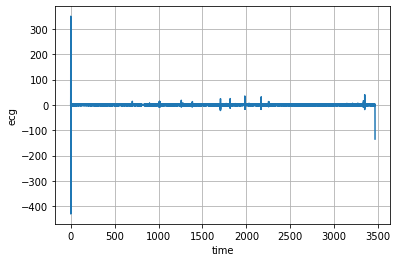

In [24]:
ecg.plot()

In [25]:
ibi = ph.BeatFromECG()(ecg)

In [26]:
ibi.get_duration() #seconds 

3464.484375

In [27]:
# create label
label = np.zeros(3464)
label[0:600] =1
label[600:3464] = 2

label = ph.EvenlySignal(label, sampling_freq = 1, signal_type = 'label') 
#sampling_freq here is not intended as real sampfeq, only the distance between one point and the other (e.g. 10 = 10 units between 'begin' & 'end')

In [28]:
# (optional) IIR filtering : remove high frequency noise
#ecg = ph.IIRFilter(fp=45, fs = 50, ftype='ellip')(ecg)

In [29]:
# normalization : normalize data
ecg = ph.Normalize(norm_method='standard')(ecg)

In [30]:
# resampling : increase the sampling frequency by cubic interpolation
ecg = ecg.resample(fout=4096, kind='cubic')
fsamp = 4096

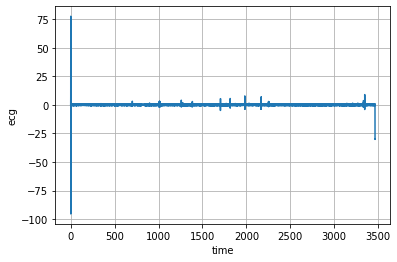

In [31]:
ecg.plot()

In [32]:
ibi = ph.BeatFromECG()(ecg)

In [33]:
ibi.get_duration()


3464.484375

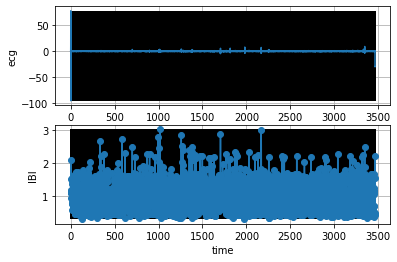

In [39]:
# check results so far
ax1 = plt.subplot(211)
ecg.plot()
plt.vlines(ibi.get_times(), np.min(ecg), np.max(ecg))

plt.subplot(212, sharex = ax1)
ibi.plot('o-')
plt.vlines(ibi.get_times(), np.min(ibi), np.max(ibi))
plt.show()

In [40]:
### physiological indicators 

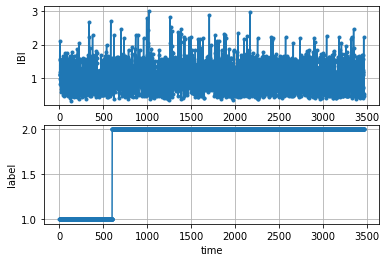

In [41]:
# check label
ax1 = plt.subplot(211)
ibi.plot('.-')

plt.subplot(212, sharex = ax1)
label.plot('.-')
plt.show()

In [42]:
# define a list of indicators we want to compute
hrv_indicators = [ph.Mean(name='RRmean'), ph.StDev(name='RRstd'), ph.RMSSD(name='rmsSD')]

In [43]:
#fixed length windowing
fixed_length = ph.FixedSegments(step = 60, width = 60, labels = label)

indicators, col_names = ph.fmap(fixed_length, hrv_indicators, ibi)

In [44]:
# extract column with the labels for each window
label_w = indicators[:, np.where(col_names == 'label')[0]]

# extract column with the RRmean values computed from each window
rrmean_w = indicators[:, np.where(col_names == 'RRmean')[0]]

rrmean_image1 = rrmean_w[np.where(label_w==1)[0]].ravel()
rrmean_image2 = rrmean_w[np.where(label_w==2)[0]].ravel()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c27cd6f50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c27ce6490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c27cd6f10>,
 'medians': [<matplotlib.lines.Line2D at 0x1c27ce1c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c1fd80410>,
 'means': []}

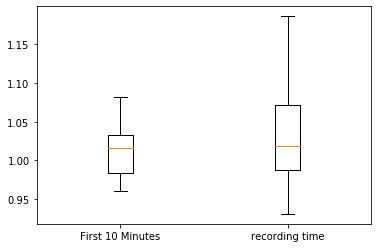

In [45]:
## create a box and whisker plot to compare the distibution of the RRmean indicator
plt.boxplot([rrmean_image1, rrmean_image2],
            labels=['First 10 Minutes', 'recording time'])

In [46]:
HRV_FD = ph.preset_hrv_fd() #frequency domain HRV indicators
print(HRV_FD)

print(HRV_FD[0].get())

[IBI_VLF_Pow, IBI_LF_Pow, IBI_HF_Pow, IBI_Total_Pow]
{'freq_min': 1e-05, 'freq_max': 0.04, 'method': 'ar', 'interp_freq': 4, 'name': 'IBI_VLF_Pow'}


In [47]:
FD_HRV_ind, col_names = ph.fmap(fixed_length, ph.preset_hrv_fd(), ibi.resample(4))

In [48]:
import pandas as pd

# create a pandas dataframe
FD_HRV_pp57_df = pd.DataFrame(FD_HRV_ind, columns=col_names)

FD_HRV_pp57_df

,begin,end,label,IBI_VLF_Pow,IBI_LF_Pow,IBI_HF_Pow,IBI_Total_Pow
0,1.235107,61.235107,1.0,157.882743,381.109477,895.500737,2117.059008
1,61.235107,121.235107,1.0,161.688163,374.636872,768.712316,2030.082937
2,121.235107,181.235107,1.0,70.036152,254.670213,838.828791,1984.120414
3,181.235107,241.235107,1.0,79.540161,298.776448,699.855814,1855.464875
4,241.235107,301.235107,1.0,172.637385,433.551233,861.584942,2210.373807
5,301.235107,361.235107,1.0,153.182290,502.335143,836.672466,2274.057433
6,361.235107,421.235107,1.0,181.372910,556.581911,690.695459,2196.354534
7,421.235107,481.235107,1.0,144.488075,343.790445,631.731836,1948.968135
8,481.235107,541.235107,1.0,221.107347,459.921482,835.484519,2197.956070
9,601.235107,661.235107,2.0,70.205533,226.306626,609.943182,1680.473060


In [49]:
#save data 
FD_HRV_pp57_df.to_csv('FD_HRV_pp57.csv')